Mounted at /content/drive
/content/drive/My Drive/Programming(Code Vision Course)-Shaziyeh/Final_project/Group Project Dundee.xlsx
Column Names after processing: Index(['Place Code', 'Intermediate Zone', 'Local Authority',
       'Local Authority (code)', 'Population ', 'Working Age population',
       'Average distance to nearest park or public garden (m)',
       'Median distance to nearest park or public garden (m)',
       'Average size of nearest park or public garden (m2)',
       'Median size of nearest park or public garden (m2)',
       'Average number of parks and public gardens in 1,000 m radius',
       'Median number of parks and public gardens in 1,000 m radius',
       'Average combined size of parks and public gardens in 1,000 m radius (m2)',
       'Median combined size of parks and public gardens in 1,000 m radius (m2)',
       'Average population per park or public garden',
       'Median population per park or public garden',
       'Number of flats in rural and bui

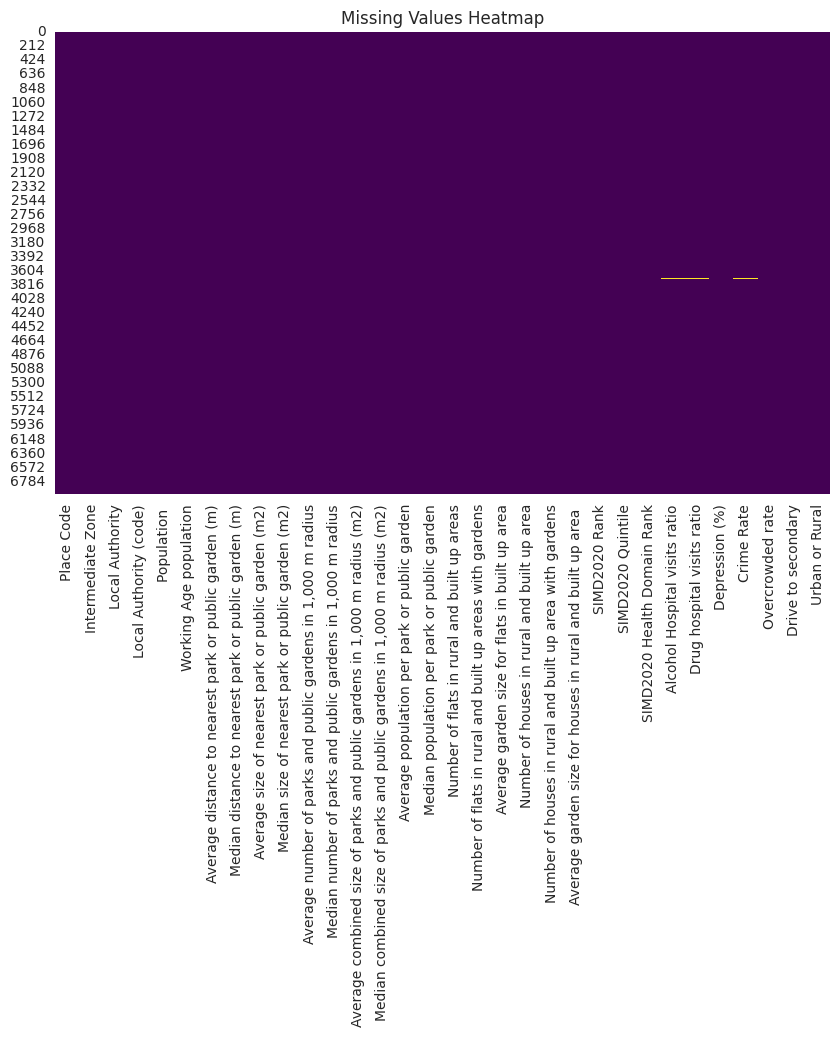

In [90]:
from google.colab import drive

def mount_drive():
    drive.mount('/content/drive', force_remount=True)
    Final_project = "/content/drive/My Drive/Programming(Code Vision Course)-Shaziyeh/Final_project/Group Project Dundee.xlsx"
    return Final_project

data_folder = mount_drive()
print(data_folder)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel(data_folder, skiprows=0, header=0)

# Display first few rows
print("Column Names after processing:", df.columns)
df.head()

# Basic Info and Summary
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

# Check Missing Values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Filter for Dundee City
df_dundee = df[df["Local Authority"] == "Dundee City"].copy()

In [91]:
# Convert column names to lowercase and remove spaces
df.columns = df.columns.str.strip().str.lower()

# Convert categorical column ('urban or rural') to binary
df['urban or rural'] = df['urban or rural'].map({'URBAN': 1, 'RURAL': 0})

# Convert all categorical columns to numeric using factorization
df = df.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'O' else col)

# Handle missing values by filling with the median
df.fillna(df.median(), inplace=True)

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())
print("Available Columns:", df.columns.tolist())

Missing values per column:
 place code                                                                  0
intermediate zone                                                           0
local authority                                                             0
local authority (code)                                                      0
population                                                                  0
working age population                                                      0
average distance to nearest park or public garden (m)                       0
median distance to nearest park or public garden (m)                        0
average size of nearest park or public garden (m2)                          0
median size of nearest park or public garden (m2)                           0
average number of parks and public gardens in 1,000 m radius                0
median number of parks and public gardens in 1,000 m radius                 0
average combined size of parks and p

In [92]:
pip install --upgrade seaborn

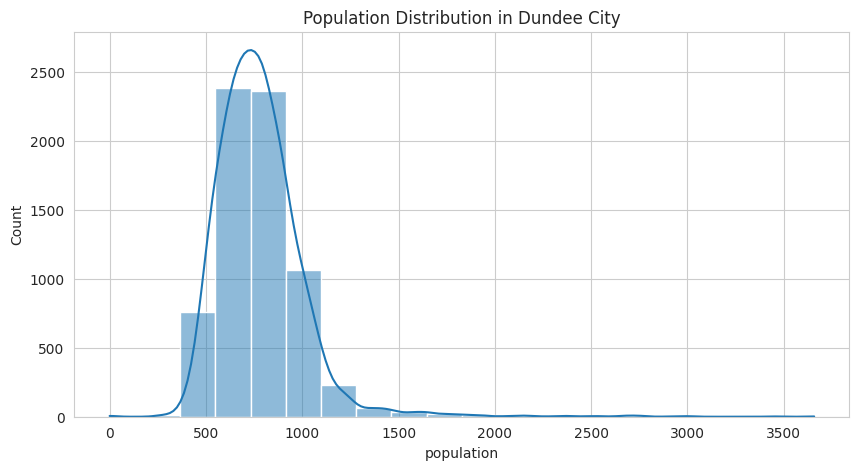

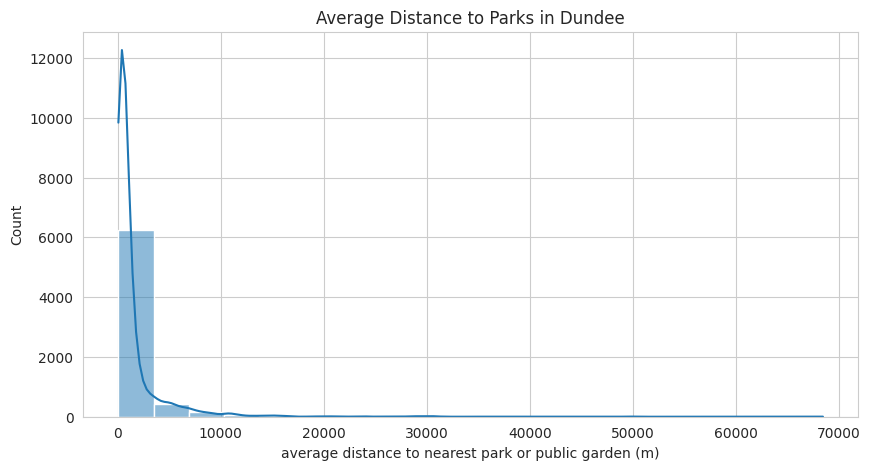

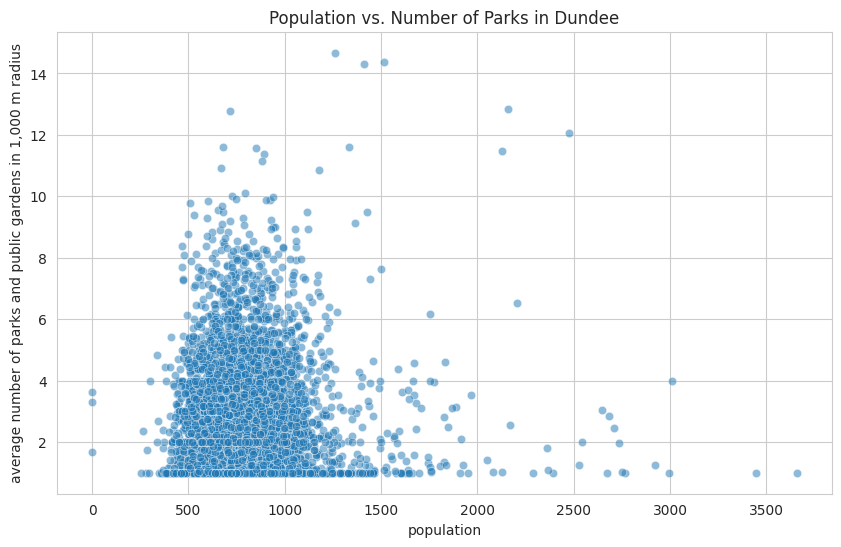

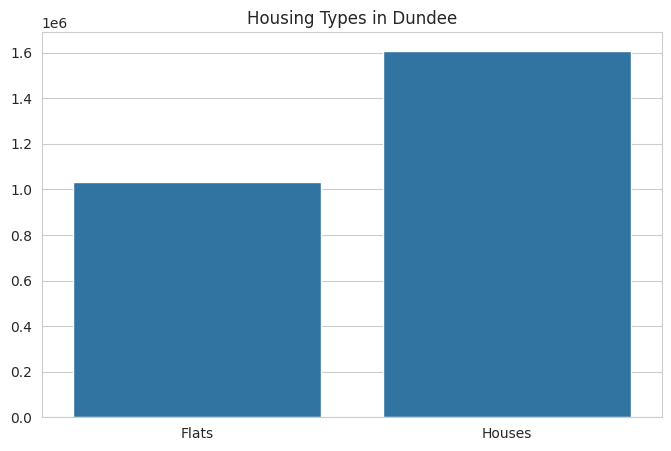

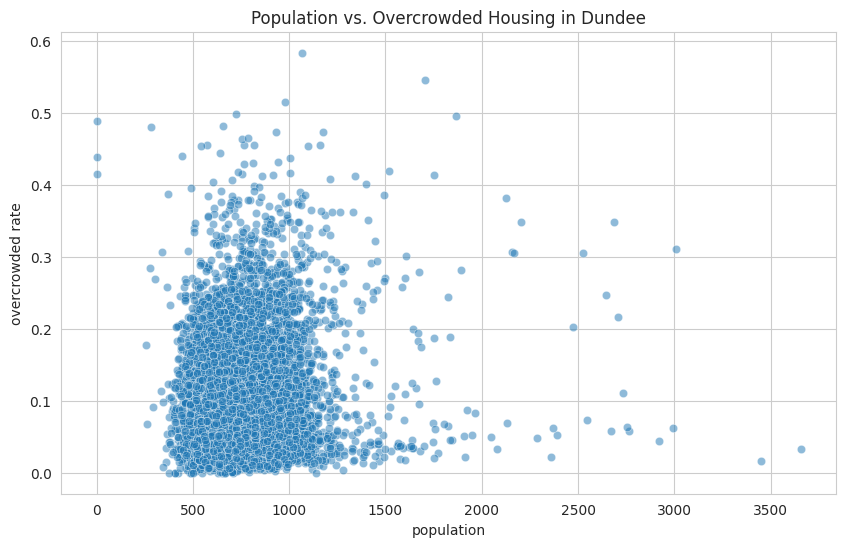

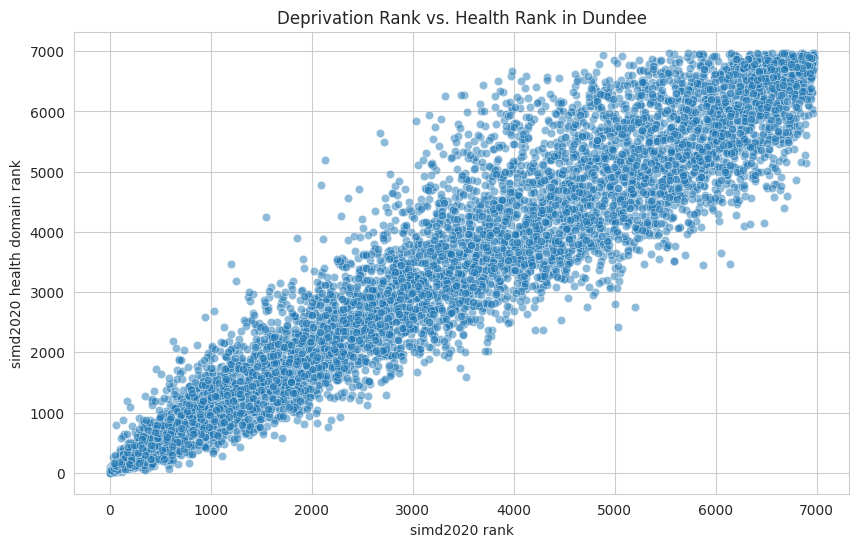

<ipython-input-93-c23c533c2f3a>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["simd2020 quintile"], y=df["crime rate"], palette="coolwarm")


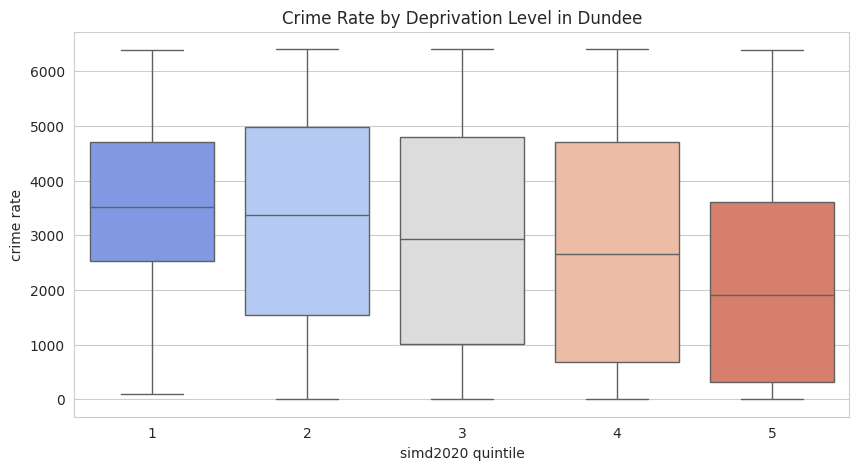

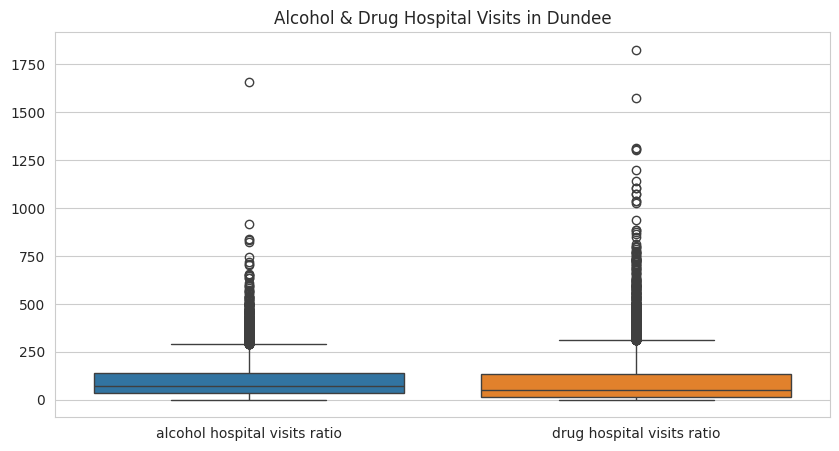

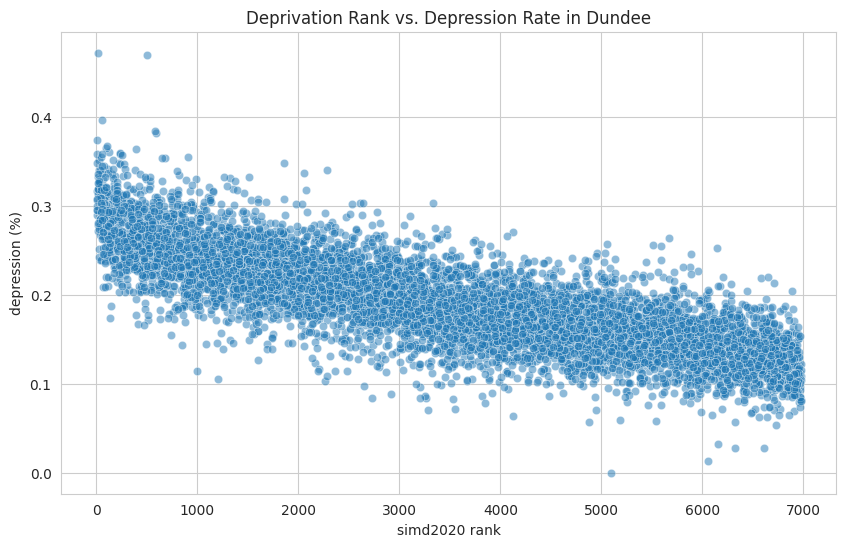

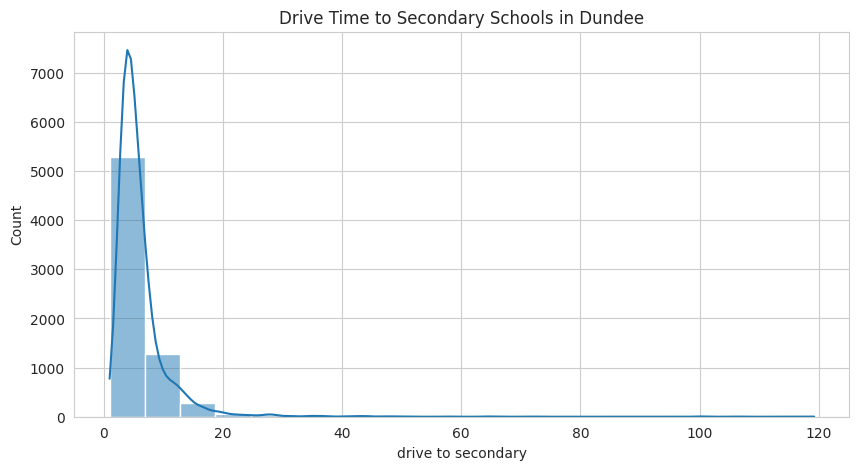

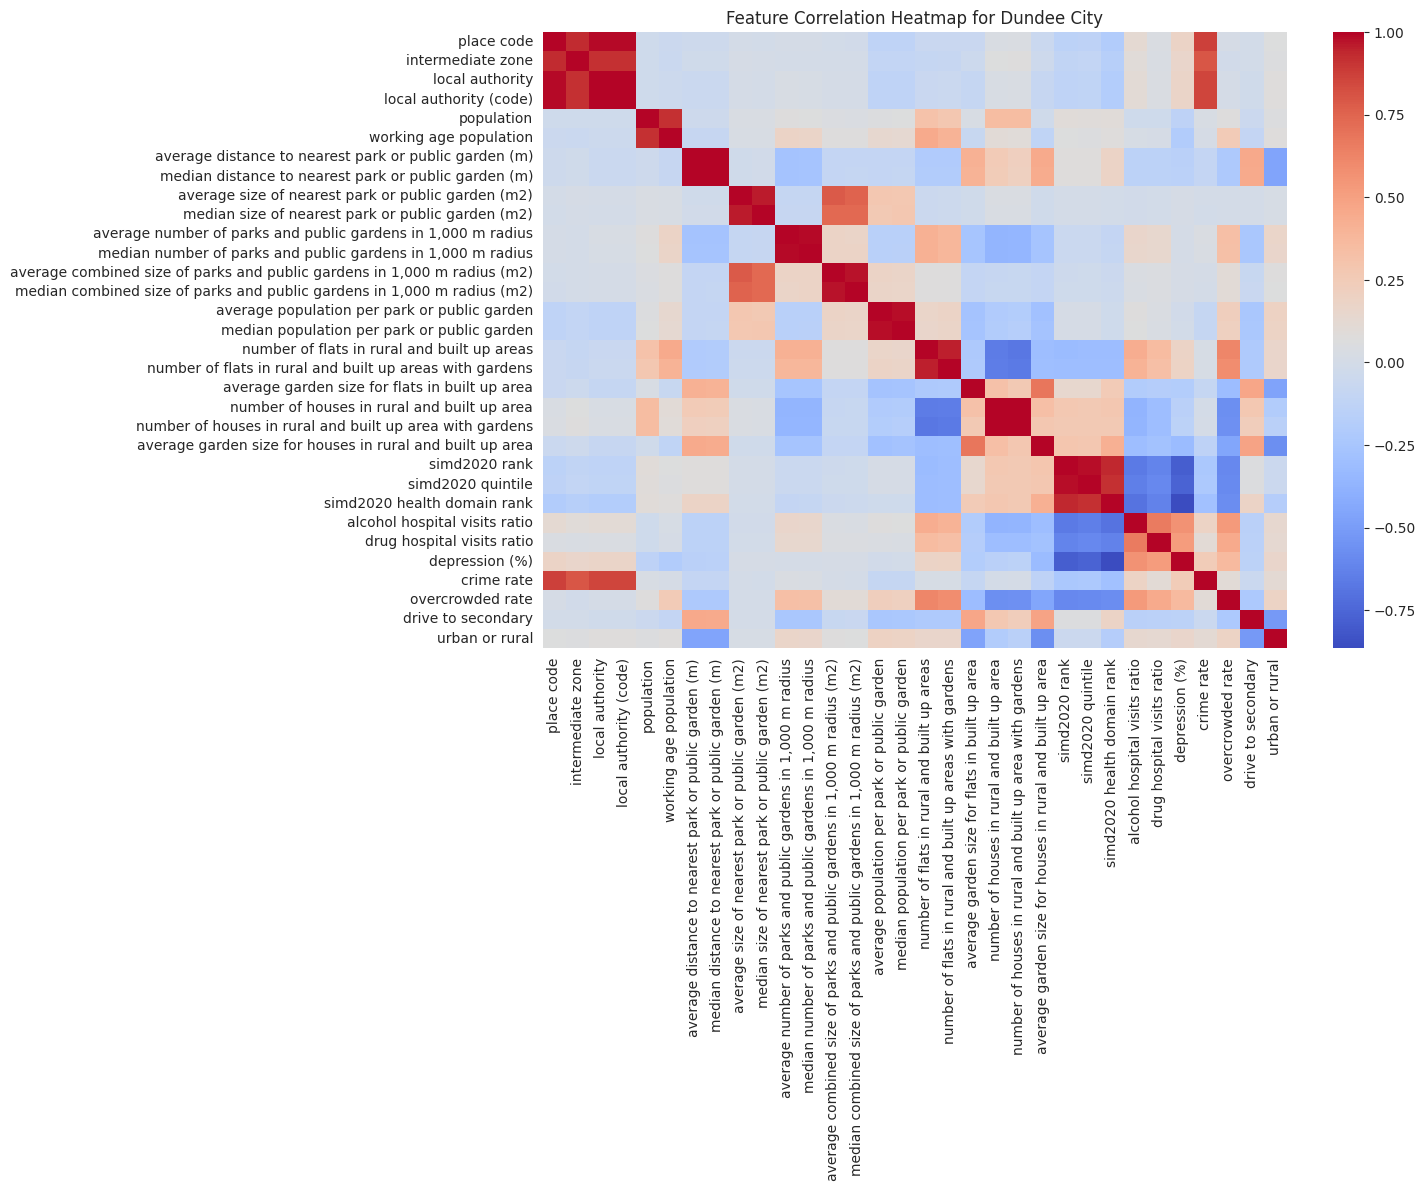

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- 1️⃣ Location & Demographics ----------------
plt.figure(figsize=(10, 5))
sns.histplot(df['population'], bins=20, kde=True)
plt.title("Population Distribution in Dundee City")
plt.show()

# Note: 'area size (sq km)' is missing in the dataset, so removing this plot
# ---------------- 2️⃣ Parks & Public Gardens Accessibility ----------------
plt.figure(figsize=(10, 5))
sns.histplot(df["average distance to nearest park or public garden (m)"], bins=20, kde=True)
plt.title("Average Distance to Parks in Dundee")
plt.show()

# 'number of parks within 1000m' is missing; using 'average number of parks and public gardens in 1,000 m radius' instead
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["population"], y=df["average number of parks and public gardens in 1,000 m radius"], alpha=0.5)
plt.title("Population vs. Number of Parks in Dundee")
plt.show()

# ---------------- 3️⃣ Population Density & Housing ----------------
plt.figure(figsize=(8, 5))
sns.barplot(x=["Flats", "Houses"],
            y=[df["number of flats in rural and built up areas"].sum(),
               df["number of houses in rural and built up area"].sum()])
plt.title("Housing Types in Dundee")
plt.show()

# 'population density' and 'overcrowded housing rate' are missing; using 'overcrowded rate' instead
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["population"], y=df["overcrowded rate"], alpha=0.5)
plt.title("Population vs. Overcrowded Housing in Dundee")
plt.show()

# ---------------- 4️⃣ Socioeconomic Deprivation (SIMD 2020) ----------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["simd2020 rank"], y=df["simd2020 health domain rank"], alpha=0.5)
plt.title("Deprivation Rank vs. Health Rank in Dundee")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["simd2020 quintile"], y=df["crime rate"], palette="coolwarm")
plt.title("Crime Rate by Deprivation Level in Dundee")
plt.show()

# ---------------- 5️⃣ Health & Wellbeing Indicators ----------------
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["alcohol hospital visits ratio", "drug hospital visits ratio"]])
plt.title("Alcohol & Drug Hospital Visits in Dundee")
plt.show()

# 'depression (%)' instead of 'depression rate'
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["simd2020 rank"], y=df["depression (%)"], alpha=0.5)
plt.title("Deprivation Rank vs. Depression Rate in Dundee")
plt.show()

# ---------------- 6️⃣ Transportation & Accessibility ----------------
plt.figure(figsize=(10, 5))
sns.histplot(df["drive to secondary"], bins=20, kde=True)
plt.title("Drive Time to Secondary Schools in Dundee")
plt.show()




# ---------------- Correlation Matrix ----------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap for Dundee City")
plt.show()


In [94]:
# ✅ Print and check column names
print("Available Columns:", df.columns.tolist())

# ✅ Use corrected column names
correct_col_name = 'average_combined_size_of_parks_and_public_gardens_in_1000_m_radius_m2'
if correct_col_name not in df.columns:
    for col in df.columns:
        if "average_combined_size" in col:  # Find the closest match
            correct_col_name = col
            print(f"⚠️ Using detected column name: {correct_col_name}")
            break


Available Columns: ['place code', 'intermediate zone', 'local authority', 'local authority (code)', 'population', 'working age population', 'average distance to nearest park or public garden (m)', 'median distance to nearest park or public garden (m)', 'average size of nearest park or public garden (m2)', 'median size of nearest park or public garden (m2)', 'average number of parks and public gardens in 1,000 m radius', 'median number of parks and public gardens in 1,000 m radius', 'average combined size of parks and public gardens in 1,000 m radius (m2)', 'median combined size of parks and public gardens in 1,000 m radius (m2)', 'average population per park or public garden', 'median population per park or public garden', 'number of flats in rural and built up areas', 'number of flats in rural and built up areas with gardens', 'average garden size for flats in built up area', 'number of houses in rural and built up area', 'number of houses in rural and built up area with gardens', 'av

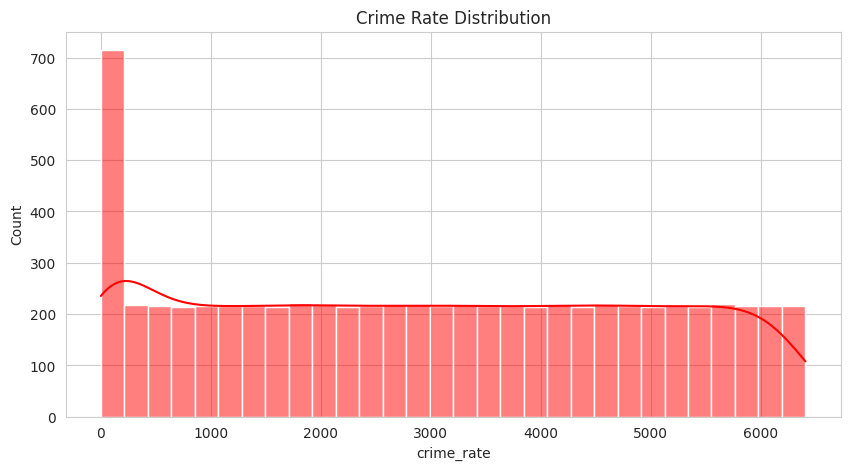

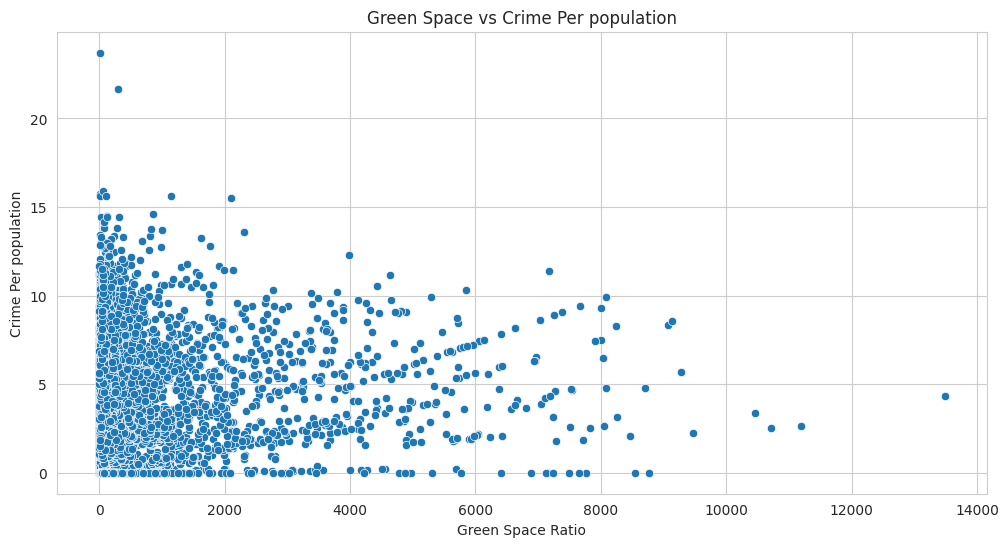

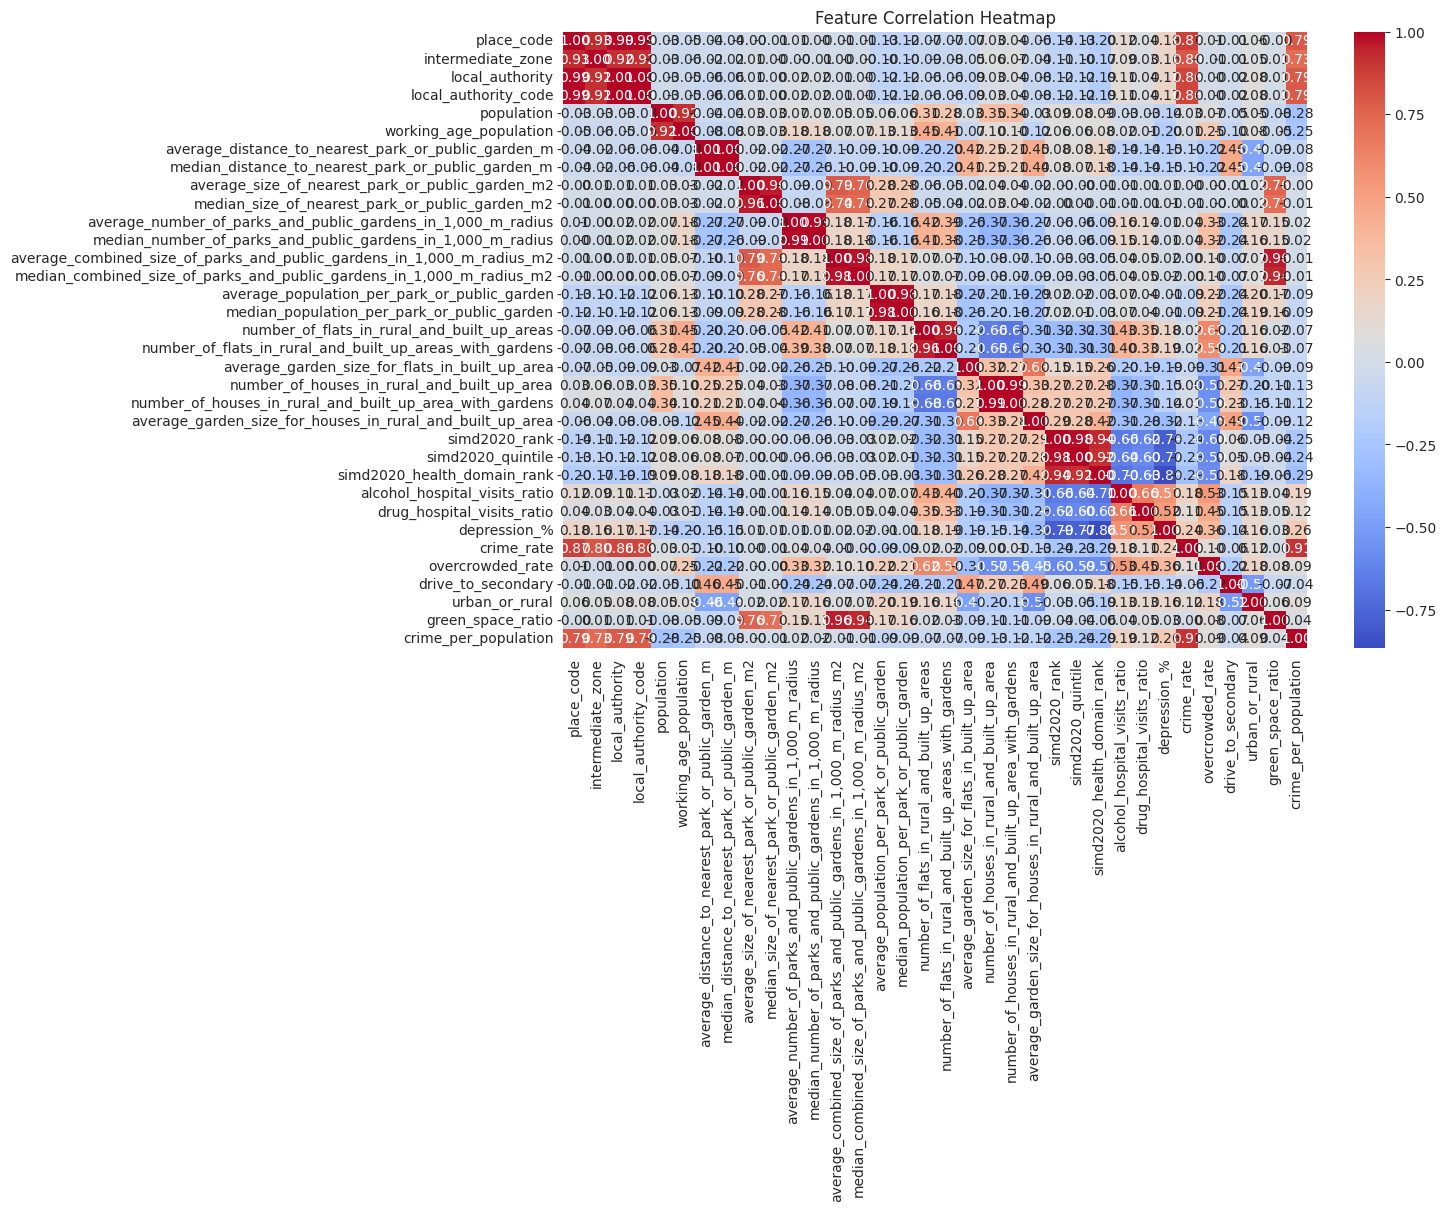

In [95]:
# ✅ Mount Google Drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans



#  Data Cleaning
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")  # Standardize column names
df.dropna(subset=['urban_or_rural'], inplace=True)  # Remove rows where "urban or rural" is missing

#  Correct column reference (keep the comma in '1,000')
df['green_space_ratio'] = df['average_combined_size_of_parks_and_public_gardens_in_1,000_m_radius_m2'] / df['population']

df['crime_per_population'] = df['crime_rate'] / df['population']

#  Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
sns.histplot(df['crime_rate'], bins=30, kde=True, color="red")
plt.title("Crime Rate Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['green_space_ratio'], y=df['crime_per_population'])
plt.title("Green Space vs Crime Per population")
plt.xlabel("Green Space Ratio")
plt.ylabel("Crime Per population")
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#  Machine Learning - Predicting Crime Rate using Linear Regression
X = df[['population', 'green_space_ratio', 'average_distance_to_nearest_park_or_public_garden_m']]
y = df['crime_rate']



In [96]:
print("Missing values in X_train:\n", X_train.isnull().sum())
print("\nInfinite values in X_train:\n", X_train.replace([np.inf, -np.inf], np.nan).isnull().sum())


Missing values in X_train:
 population                                             0
green_space_ratio                                      0
average_distance_to_nearest_park_or_public_garden_m    0
dtype: int64

Infinite values in X_train:
 population                                             0
green_space_ratio                                      0
average_distance_to_nearest_park_or_public_garden_m    0
dtype: int64



🔹 Regression Model Performance 🔹
Intercept: 2886.4443695270447
Coefficients: {'population': np.float64(0.22311857951156333), 'green_space_ratio': np.float64(-0.012799136915022678), 'average_distance_to_nearest_park_or_public_garden_m': np.float64(-0.056844088040023596)}


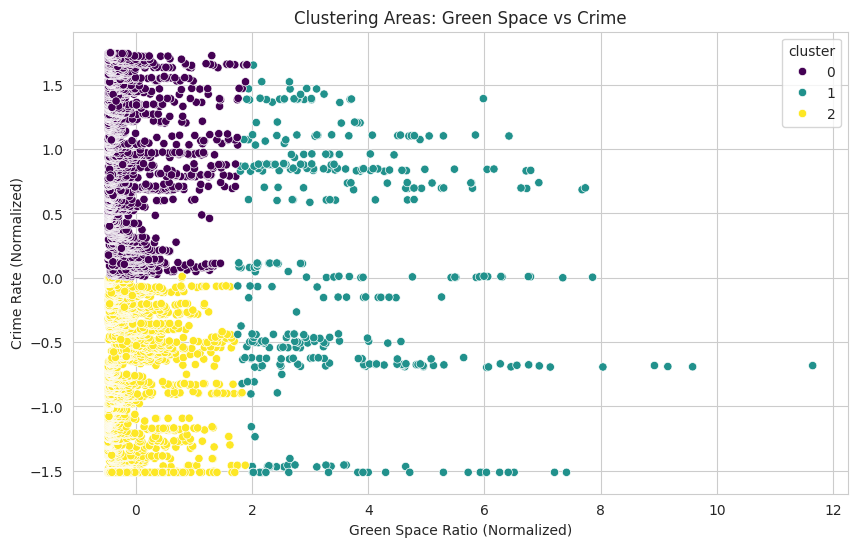

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ✅ Handle Inf & Missing Values
def clean_data(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
    df.fillna(df.median(), inplace=True)  # Replace NaN with median
    return df

df = clean_data(df)  # Apply data cleaning

# ✅ Feature Selection
X = df[['population', 'green_space_ratio', 'average_distance_to_nearest_park_or_public_garden_m']]
y = df['crime_rate']  # Target variable

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 🔹 Model Performance
print("\n🔹 Regression Model Performance 🔹")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")

# ✅ Clustering: Green Space & Crime
scaler = StandardScaler()
df[['green_space_ratio', 'crime_rate']] = scaler.fit_transform(df[['green_space_ratio', 'crime_rate']])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[['green_space_ratio', 'crime_rate']])

# 🔹 Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['green_space_ratio'], y=df['crime_rate'], hue=df['cluster'], palette='viridis')
plt.title("Clustering Areas: Green Space vs Crime")
plt.xlabel("Green Space Ratio (Normalized)")
plt.ylabel("Crime Rate (Normalized)")
plt.show()


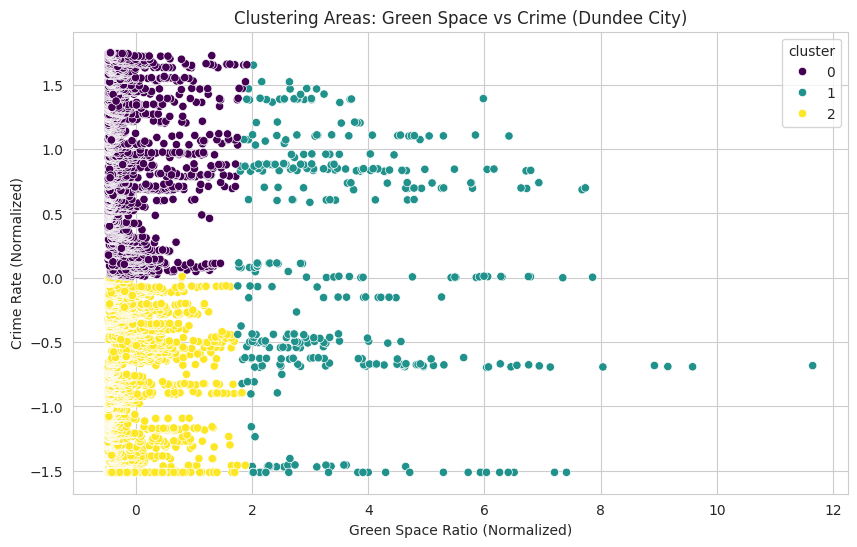

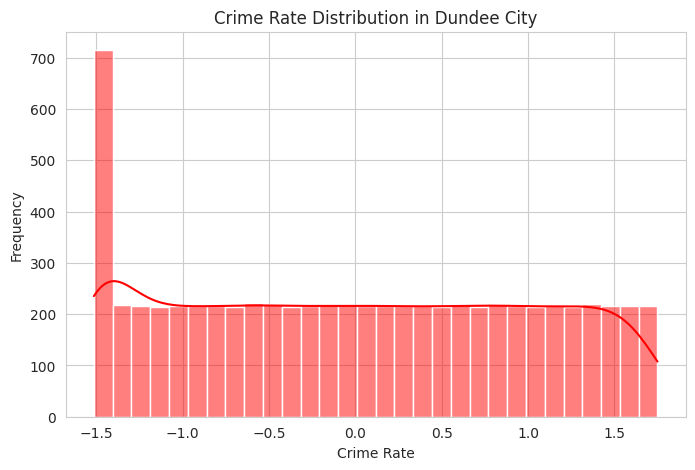

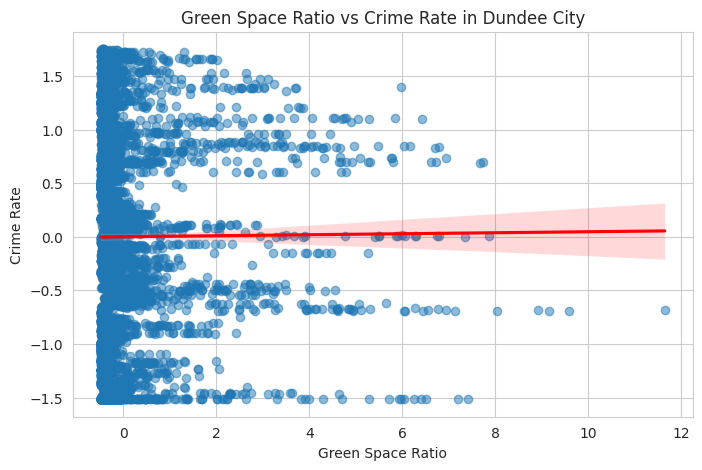

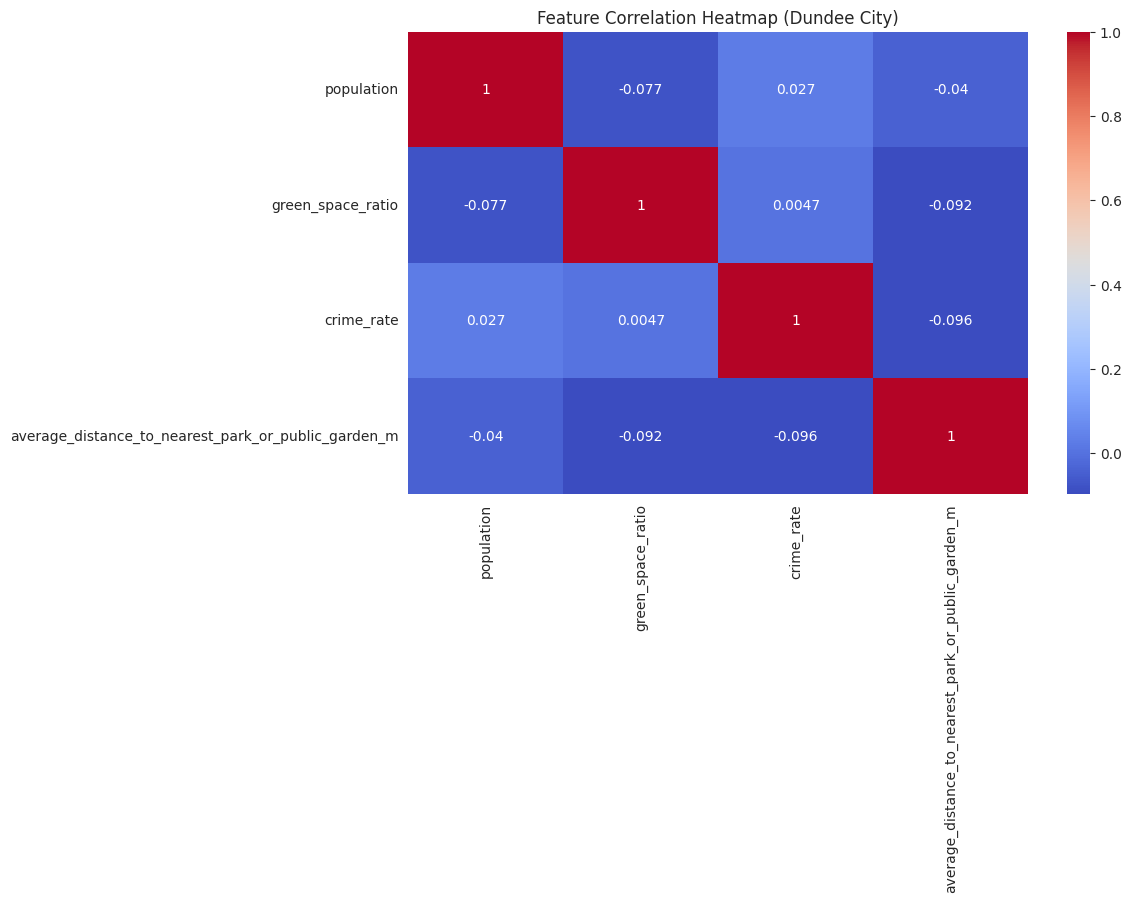

<ipython-input-98-112ba6855b72>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['cluster'], y=df['crime_rate'], palette='coolwarm')


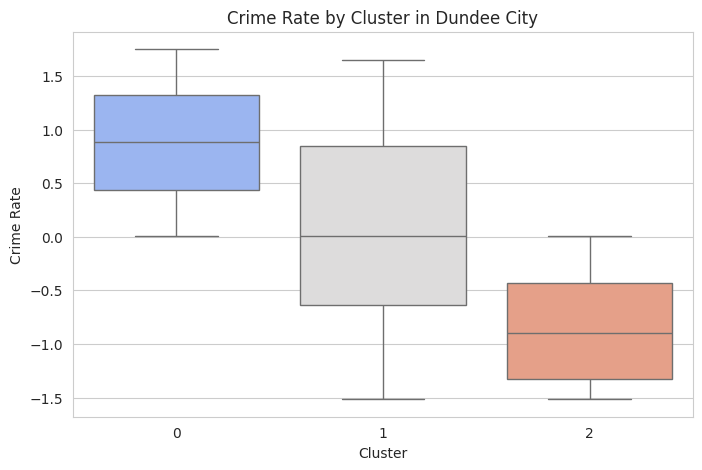

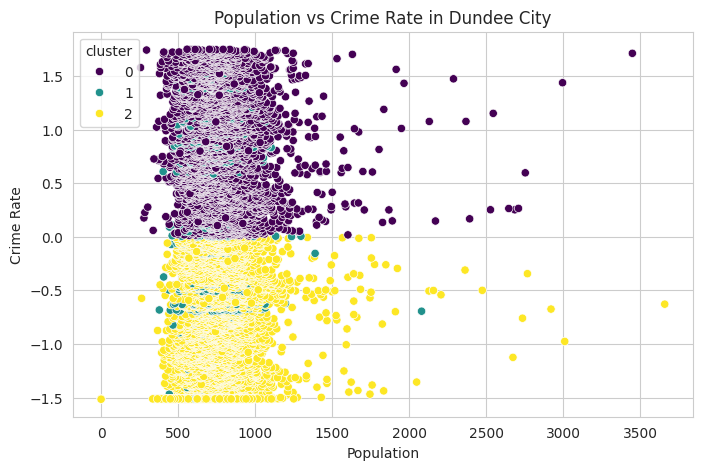

In [98]:
scaler = StandardScaler()
df[['green_space_ratio', 'crime_rate']] = scaler.fit_transform(df[['green_space_ratio', 'crime_rate']])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[['green_space_ratio', 'crime_rate']])

# 🔹 Visualization: Clustering Green Space & Crime
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['green_space_ratio'], y=df['crime_rate'], hue=df['cluster'], palette='viridis')
plt.title("Clustering Areas: Green Space vs Crime (Dundee City)")
plt.xlabel("Green Space Ratio (Normalized)")
plt.ylabel("Crime Rate (Normalized)")
plt.show()

# 🔹 Additional Visualizations
# ✅ Crime Rate Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['crime_rate'], bins=30, kde=True, color='red')
plt.title("Crime Rate Distribution in Dundee City")
plt.xlabel("Crime Rate")
plt.ylabel("Frequency")
plt.show()

# ✅ Green Space vs Crime Rate Scatterplot
plt.figure(figsize=(8, 5))
sns.regplot(x=df['green_space_ratio'], y=df['crime_rate'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Green Space Ratio vs Crime Rate in Dundee City")
plt.xlabel("Green Space Ratio")
plt.ylabel("Crime Rate")
plt.show()

# ✅ Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['population', 'green_space_ratio', 'crime_rate', 'average_distance_to_nearest_park_or_public_garden_m']].corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap (Dundee City)")
plt.show()

# ✅ Boxplot of Crime Rate by Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['cluster'], y=df['crime_rate'], palette='coolwarm')
plt.title("Crime Rate by Cluster in Dundee City")
plt.xlabel("Cluster")
plt.ylabel("Crime Rate")
plt.show()

# ✅ Population vs Crime Rate
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['population'], y=df['crime_rate'], hue=df['cluster'], palette='viridis')
plt.title("Population vs Crime Rate in Dundee City")
plt.xlabel("Population")
plt.ylabel("Crime Rate")
plt.show()


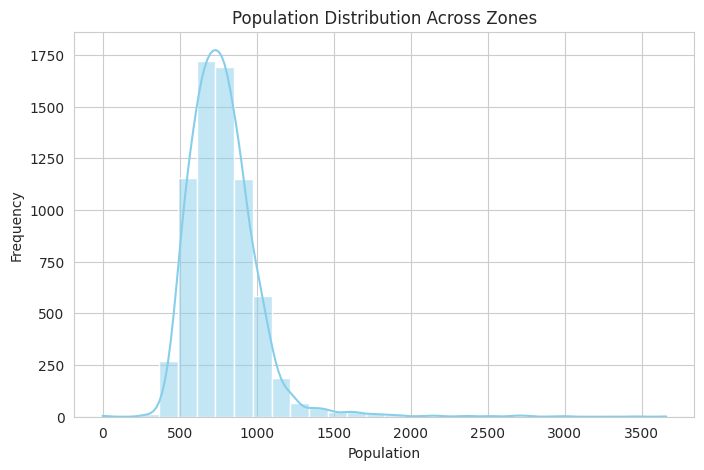

Index(['place_code', 'intermediate_zone', 'local_authority',
       'local_authority_code', 'population', 'working_age_population',
       'average_distance_to_nearest_park_or_public_garden_m',
       'median_distance_to_nearest_park_or_public_garden_m',
       'average_size_of_nearest_park_or_public_garden_m2',
       'median_size_of_nearest_park_or_public_garden_m2',
       'average_number_of_parks_and_public_gardens_in_1,000_m_radius',
       'median_number_of_parks_and_public_gardens_in_1,000_m_radius',
       'average_combined_size_of_parks_and_public_gardens_in_1,000_m_radius_m2',
       'median_combined_size_of_parks_and_public_gardens_in_1,000_m_radius_m2',
       'average_population_per_park_or_public_garden',
       'median_population_per_park_or_public_garden',
       'number_of_flats_in_rural_and_built_up_areas',
       'number_of_flats_in_rural_and_built_up_areas_with_gardens',
       'average_garden_size_for_flats_in_built_up_area',
       'number_of_houses_in_rural_and_b

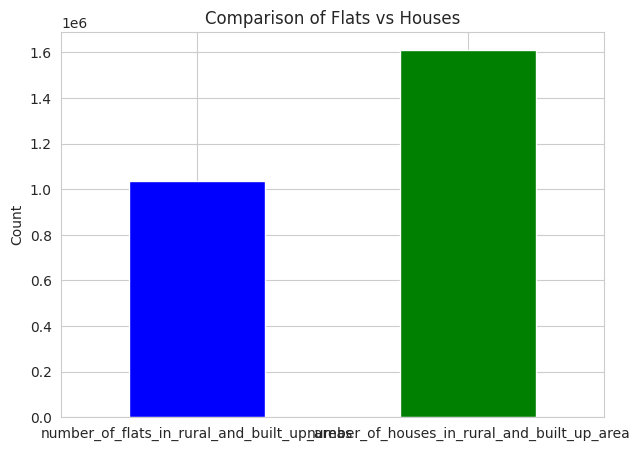

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans

# Population Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['population'], bins=30, kde=True, color='skyblue')
plt.title("Population Distribution Across Zones")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

print(df.columns)


# Housing Types
housing_types = df[['number_of_flats_in_rural_and_built_up_areas',
                    'number_of_houses_in_rural_and_built_up_area']].sum()

housing_types.plot(kind='bar', color=['blue', 'green'], figsize=(7,5))
plt.title("Comparison of Flats vs Houses")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



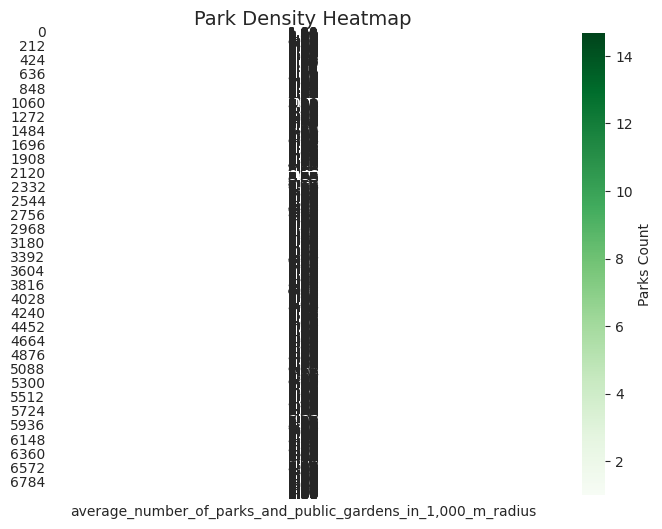

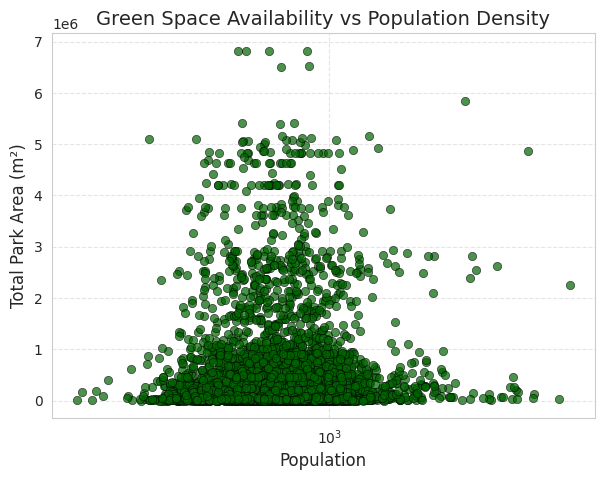

<ipython-input-104-cb62a6a4ccf4>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['simd2020_quintile'], y=df['crime_rate'], palette='coolwarm', width=0.5)


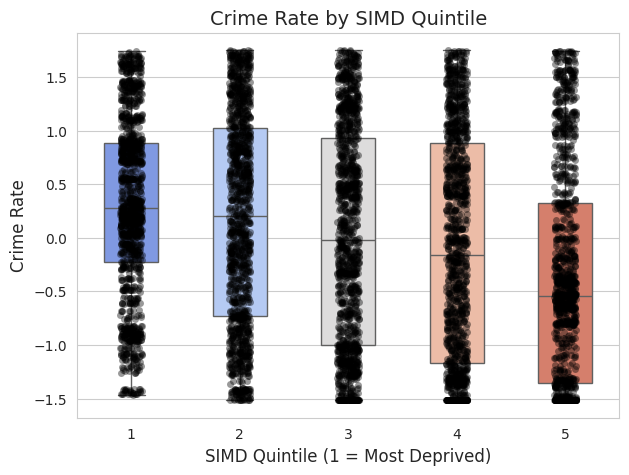

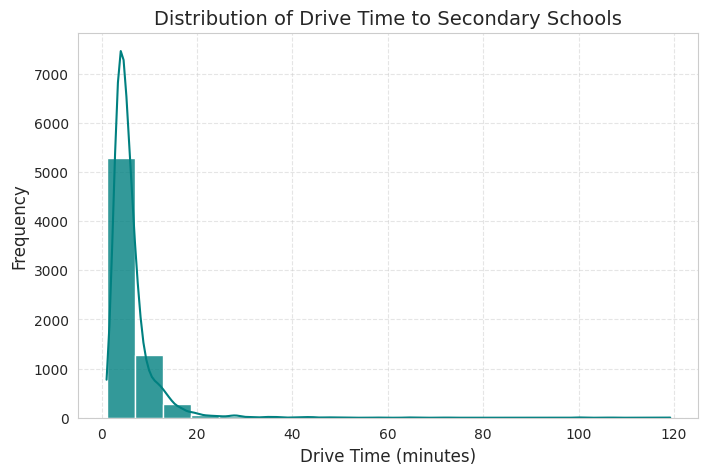

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans

# Set Seaborn style
sns.set_style("whitegrid")

# Park Density Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['average_number_of_parks_and_public_gardens_in_1,000_m_radius']],
            cmap='Greens', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Parks Count'})
plt.title("Park Density Heatmap", fontsize=14)
plt.show()

# Green Space vs Population Density
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['population'],
                y=df['average_combined_size_of_parks_and_public_gardens_in_1,000_m_radius_m2'],
                color='darkgreen', alpha=0.7, edgecolor='black')
plt.title("Green Space Availability vs Population Density", fontsize=14)
plt.xlabel("Population", fontsize=12)
plt.ylabel("Total Park Area (m²)", fontsize=12)
plt.xscale("log")  # If population varies greatly, use log scale
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# SIMD Quintile vs Crime Rate
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['simd2020_quintile'], y=df['crime_rate'], palette='coolwarm', width=0.5)
sns.stripplot(x=df['simd2020_quintile'], y=df['crime_rate'], color='black', alpha=0.4, jitter=True)
plt.title("Crime Rate by SIMD Quintile", fontsize=14)
plt.xlabel("SIMD Quintile (1 = Most Deprived)", fontsize=12)
plt.ylabel("Crime Rate", fontsize=12)
plt.show()




# Drive Time to Secondary Schools
plt.figure(figsize=(8, 5))
sns.histplot(df['drive_to_secondary'], bins=20, color='teal', kde=True, alpha=0.8)
plt.title("Distribution of Drive Time to Secondary Schools", fontsize=14)
plt.xlabel("Drive Time (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()






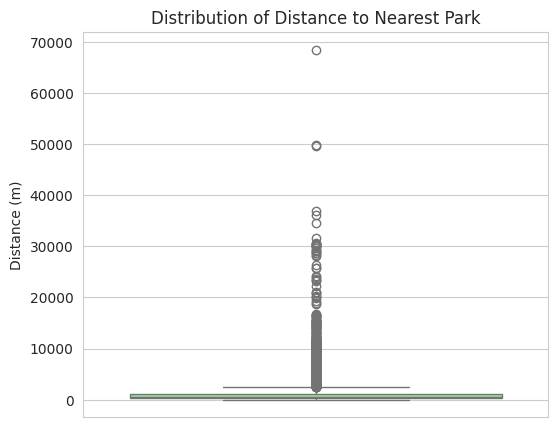

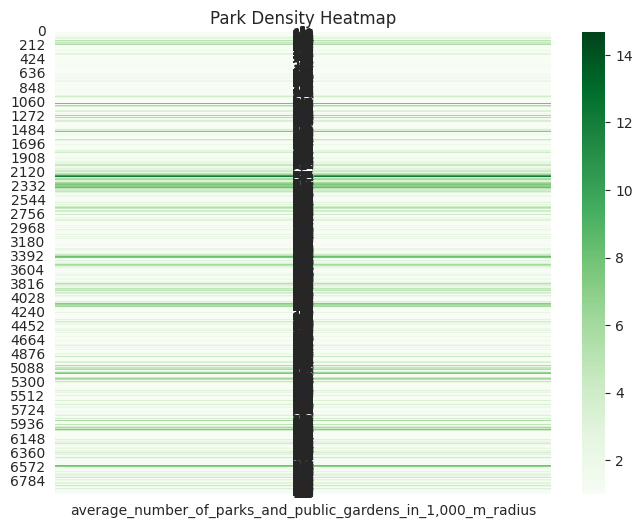

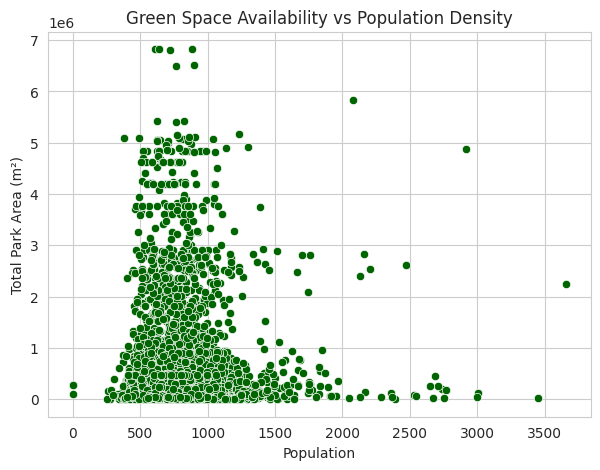

<ipython-input-101-d446417568d5>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['simd2020_quintile'], y=df['crime_rate'], palette='coolwarm')


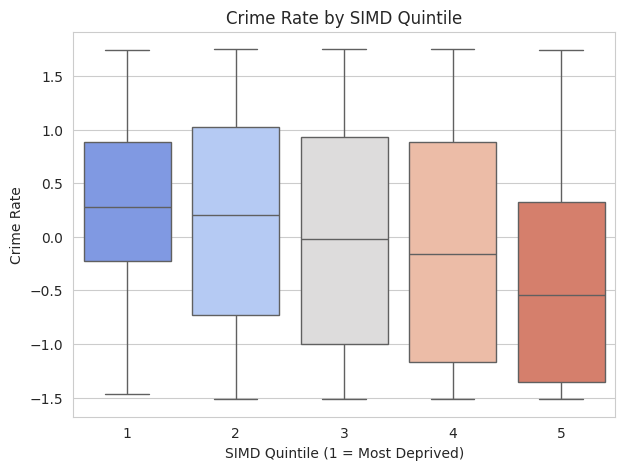

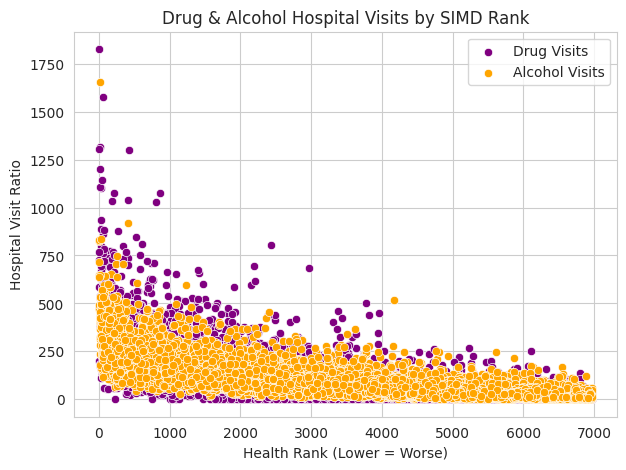

In [101]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans

# 1. Distance to Nearest Park
# Why? Understanding the accessibility of parks is crucial for evaluating the quality of urban planning.
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['average_distance_to_nearest_park_or_public_garden_m'], color='lightgreen')
plt.title("Distribution of Distance to Nearest Park")
plt.ylabel("Distance (m)")
plt.show()

# 2. Park Density Heatmap
# Why? It helps identify areas with high or low availability of parks, which is essential for public health and recreation planning.
plt.figure(figsize=(8, 6))
sns.heatmap(df[['average_number_of_parks_and_public_gardens_in_1,000_m_radius']], cmap='Greens', annot=True)
plt.title("Park Density Heatmap")
plt.show()

# 3. Green Space vs Population Density
# Why? It shows whether higher population areas have enough green space, which can impact residents' well-being.
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['population'], y=df['average_combined_size_of_parks_and_public_gardens_in_1,000_m_radius_m2'], color='darkgreen')
plt.title("Green Space Availability vs Population Density")
plt.xlabel("Population")
plt.ylabel("Total Park Area (m²)")
plt.show()

# 4. SIMD Quintile vs Crime Rate
# Why? Understanding crime rates across different deprivation levels helps in social policy planning.
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['simd2020_quintile'], y=df['crime_rate'], palette='coolwarm')
plt.title("Crime Rate by SIMD Quintile")
plt.xlabel("SIMD Quintile (1 = Most Deprived)")
plt.ylabel("Crime Rate")
plt.show()

# 5. Drug & Alcohol Hospital Visits
# Why? Identifies patterns in health issues across socioeconomic statuses.
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['simd2020_health_domain_rank'], y=df['drug_hospital_visits_ratio'], color='purple', label="Drug Visits")
sns.scatterplot(x=df['simd2020_health_domain_rank'], y=df['alcohol_hospital_visits_ratio'], color='orange', label="Alcohol Visits")
plt.title("Drug & Alcohol Hospital Visits by SIMD Rank")
plt.xlabel("Health Rank (Lower = Worse)")
plt.ylabel("Hospital Visit Ratio")
plt.legend()
plt.show()




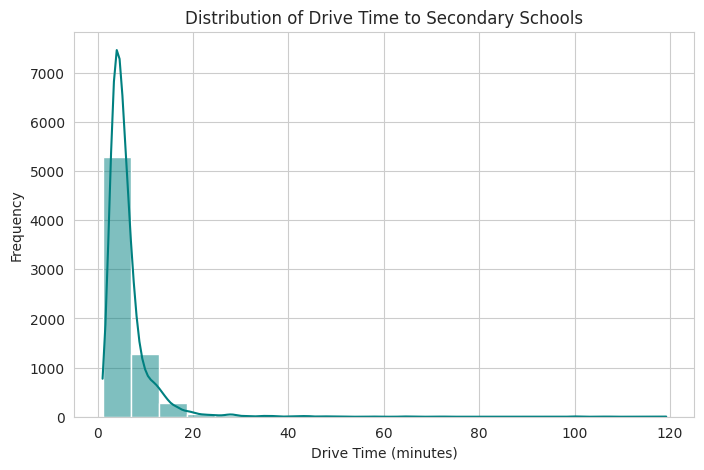

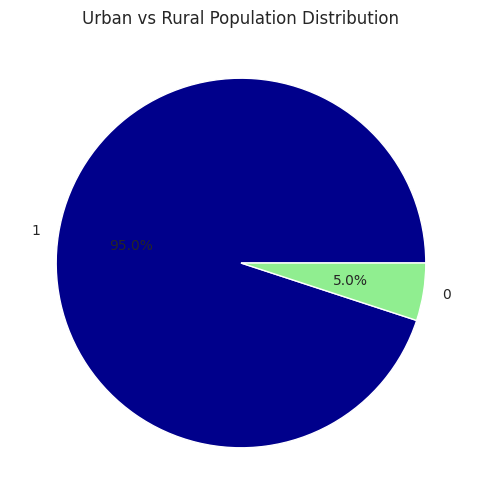

In [105]:
# 7. Drive Time to Secondary Schools
# Why? Understanding school accessibility helps in urban planning and identifying educational inequalities.
plt.figure(figsize=(8, 5))
sns.histplot(df['drive_to_secondary'], bins=20, color='teal', kde=True)
plt.title("Distribution of Drive Time to Secondary Schools")
plt.xlabel("Drive Time (minutes)")
plt.ylabel("Frequency")
plt.show()

# 8. Urban vs. Rural Population
# Why? This pie chart provides a quick understanding of how the population is distributed between urban and rural areas.
urban_rural_counts = df['urban_or_rural'].value_counts()
urban_rural_counts.plot.pie(autopct='%1.1f%%', colors=['darkblue', 'lightgreen'], figsize=(6, 6))
plt.title("Urban vs Rural Population Distribution")
plt.ylabel("")
plt.show()




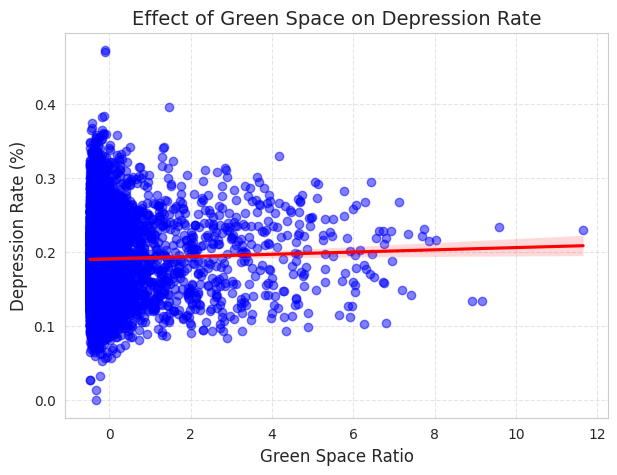

In [106]:
# 6. Depression Rate vs Green Space
# Why? Helps evaluate whether green spaces have a potential mental health benefit.
plt.figure(figsize=(7, 5))
sns.regplot(x=df['green_space_ratio'], y=df['depression_%'], scatter_kws={'color': 'blue', 'alpha': 0.5},
            line_kws={'color': 'red'})
plt.title("Effect of Green Space on Depression Rate", fontsize=14)
plt.xlabel("Green Space Ratio", fontsize=12)
plt.ylabel("Depression Rate (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### **Effect of Green Space on Depression Rate**  

This scatter plot with a regression line **examines the relationship between green space availability and depression rates**.

### **What the Graph Shows**
- **X-axis (Green Space Ratio):** Measures the proportion of green spaces in an area.  
- **Y-axis (Depression Rate %):** Represents the percentage of the population diagnosed with depression.  
- **Blue Dots:** Each point represents a specific area in the dataset.  
- **Red Regression Line:** Indicates the trend between green space and depression rates.  

### **Key Insights**
1. **Weak Correlation:** The regression line is nearly flat, suggesting **little to no strong relationship** between green space and depression rate.  
2. **High Depression at Low Green Space:** Many points cluster on the left side (low green space), showing **higher depression rates in areas with little green space**.  
3. **Outliers:** Some areas with **high green space** still have **high depression rates**, indicating that other factors (e.g., income, social support) may play a role.  

### **Why This Matters**
- **Urban Planning:** If green space significantly reduced depression, cities could prioritize parks and gardens for mental health benefits.  
- **Public Health Policies:** While green space alone may not lower depression rates, it could be a part of **holistic mental health strategies**.  
- **Further Analysis Needed:** It would be valuable to control for **other socio-economic factors** (e.g., poverty, social isolation) to see if green space has a stronger impact under specific conditions.  


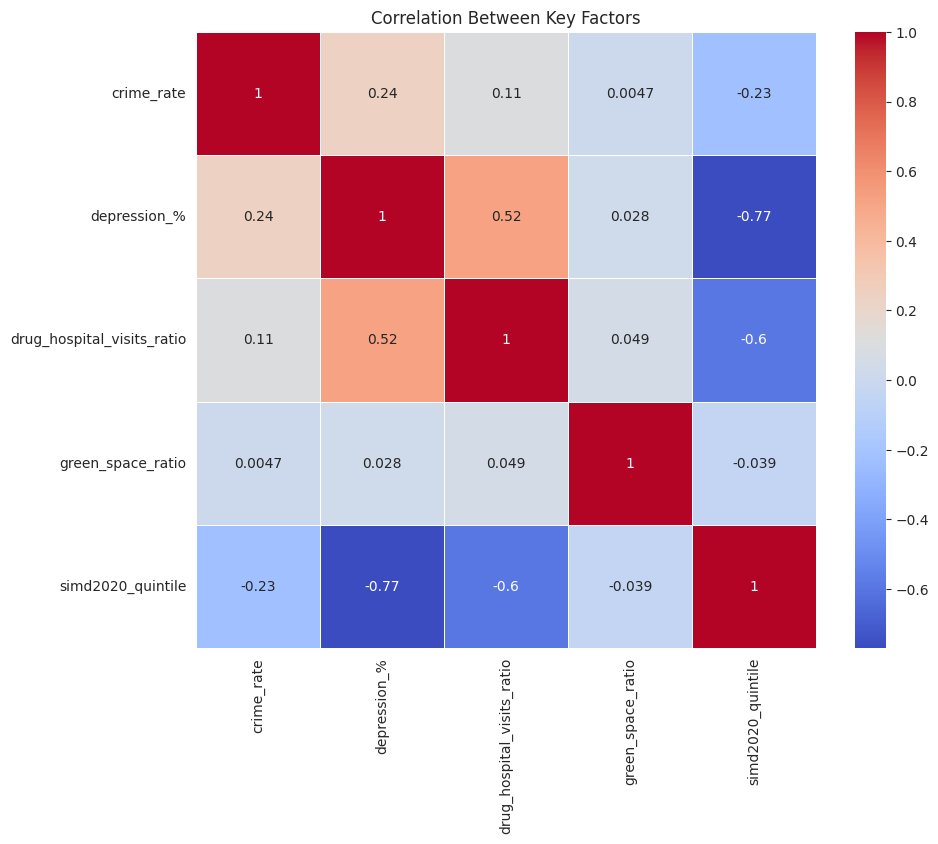

In [107]:
# 9. Correlation Heatmap
# Why? Helps identify relationships between key factors such as crime rate, mental health, and green space.
plt.figure(figsize=(10, 8))
sns.heatmap(df[['crime_rate', 'depression_%', 'drug_hospital_visits_ratio', 'green_space_ratio', 'simd2020_quintile']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Key Factors")
plt.show()

This is a **correlation heatmap** that shows the relationships between key factors like **crime rate, depression rate, drug hospital visits, green space ratio, and SIMD quintile**. Here's what it tells us:

1. **Crime Rate & SIMD Quintile (-0.23)**
   - A negative correlation suggests that areas with **higher deprivation (lower SIMD quintile)** tend to have **higher crime rates**.

2. **Depression Rate & SIMD Quintile (-0.77)**
   - A strong negative correlation means that **more deprived areas (lower SIMD quintile) have higher depression rates**.
   - This highlights a key **mental health disparity** based on socioeconomic status.

3. **Drug Hospital Visits & SIMD Quintile (-0.60)**
   - Strong negative correlation shows that **areas with high deprivation have more hospital visits due to drug-related issues**.
   - Indicates that poverty and substance abuse might be linked.

4. **Depression & Drug Hospital Visits (0.52)**
   - A positive correlation suggests that **higher depression rates are associated with more drug hospital visits**.
   - This supports the idea that mental health struggles may lead to higher substance use.

5. **Green Space Ratio & Depression (-0.028, weak correlation)**
   - Very weak negative correlation suggests that **green space may not have a strong direct effect on depression rates in this dataset**.
   - Other factors might be influencing mental health more.

### **Key Takeaways**
- **Deprivation (SIMD) is closely linked to crime, depression, and drug hospital visits.**
- **Green space doesn't show a strong link to depression in this data, but other studies suggest it might be important.**
- **Mental health and substance abuse are intertwined issues, especially in deprived areas.**


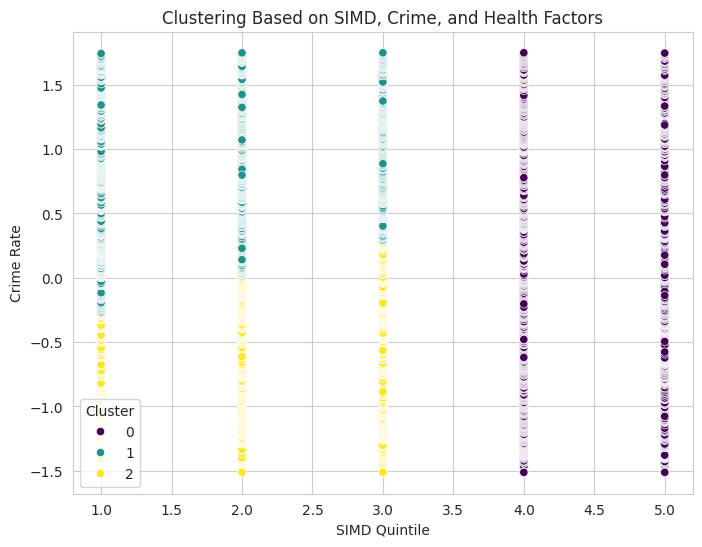

In [108]:


# 10. Clustering (K-Means)
# Why? Groups areas based on socioeconomic, crime, and health factors to help in targeted policy making.
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['simd2020_quintile', 'crime_rate', 'depression_%']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['simd2020_quintile'], y=df['crime_rate'], hue=df['cluster'], palette='viridis')
plt.title("Clustering Based on SIMD, Crime, and Health Factors")
plt.xlabel("SIMD Quintile")
plt.ylabel("Crime Rate")
plt.legend(title="Cluster")
plt.show()

This scatterplot represents the **clustering of areas based on SIMD Quintile, Crime Rate, and Depression Rate** using the **K-Means algorithm**. Let’s break it down:

### **What the Graph Shows**
- **X-axis (SIMD Quintile)**: Represents the **Scottish Index of Multiple Deprivation (SIMD)**, where **1 = most deprived** and **5 = least deprived**.
- **Y-axis (Crime Rate)**: Represents the level of crime in different areas.
- **Color (Clusters)**: The **K-Means algorithm** grouped areas into **three clusters (0, 1, 2)**, shown in different colors.

### **Key Insights**
1. **Distinct Groups Based on SIMD**
   - Clusters **appear well-separated** along the SIMD axis.
   - **Lower SIMD areas (1-3)** have a mix of different clusters, showing variations in crime.
   - **Higher SIMD areas (4-5)** are mostly from a single cluster, indicating stability in those regions.

2. **Crime Rate Differences**
   - **Deprived areas (SIMD = 1-2)** have a wider spread in crime rates.
   - **Higher SIMD (4-5)** shows **lower crime rates** and more consistent clustering.

3. **Why This Matters**
   - Policymakers can **identify high-risk areas** for crime intervention.
   - Clustering helps understand **patterns in socio-economic conditions** and their link to crime.
   - It may inform **urban planning, funding, and social programs** for improving living conditions.
